In [2]:
import numpy as np

class Perceptron:
    def __init__(self,input_dim):
        self.weights = np.random.rand(input_dim)
        self.bias = np.random.rand()

    def predict(self,inputs):
        weighted_sum = np.dot(inputs,self.weights) + self.bias
        return 1 if weighted_sum >=0 else 0

input_data = np.array([1,-1,1,-1,-2])
perceptron = Perceptron(input_dim=len(input_data))
prediction = perceptron.predict(input_data)
print("Prediction:",prediction)

Prediction: 0


In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [4]:
np.random.seed(42)
X = np.random.rand(100,10)
y = np.random.randint(2,size=100)

In [5]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim = 10))

c:\Users\venka\AppData\Local\anaconda3\envs\ML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step - accuracy: 0.5055 - loss: 0.6997 - val_accuracy: 0.3500 - val_loss: 0.7005
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4898 - loss: 0.6977 - val_accuracy: 0.3500 - val_loss: 0.7028
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.5367 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.7048
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5305 - loss: 0.6898 - val_accuracy: 0.4500 - val_loss: 0.7075
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5641 - loss: 0.6852 - val_accuracy: 0.5000 - val_loss: 0.7102
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5422 - loss: 0.6860 - val_accuracy: 0.4500 - val_loss: 0.7125
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5578 - loss: 0.6823 - val_accuracy: 0.4500 - val_loss: 0.7144
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5719 - loss: 0.6786 - val_accuracy: 0.4500 - val_loss: 0.7149

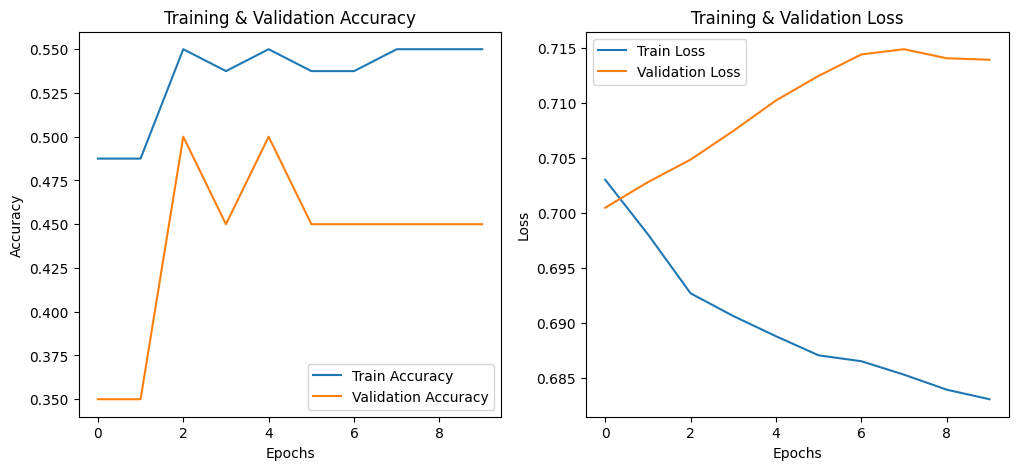

In [8]:
import matplotlib.pyplot as plt
# Plot training accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.4903 - loss: 1.7077 - val_accuracy: 0.3000 - val_loss: 1.2484 - learning_rate: 0.0100
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6302 - loss: 1.1941 - val_accuracy: 0.4000 - val_loss: 1.2068 - learning_rate: 0.0100
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5729 - loss: 1.2614 - val_accuracy: 0.3500 - val_loss: 1.1753 - learning_rate: 0.0100
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6545 - loss: 1.1757 - val_accuracy: 0.6000 - val_loss: 1.1490 - learning_rate: 0.0100
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6694 - loss: 1.0862 - val_accuracy: 0.4500 - val_loss: 1.1331 - learning_rate: 0.0100
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6575 - loss: 1.0132 - val_accuracy: 0.4500 - val_loss: 1.1188 - learning_rate: 0.0100
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7580 - loss: 0.9678 - val_accuracy: 0.4000

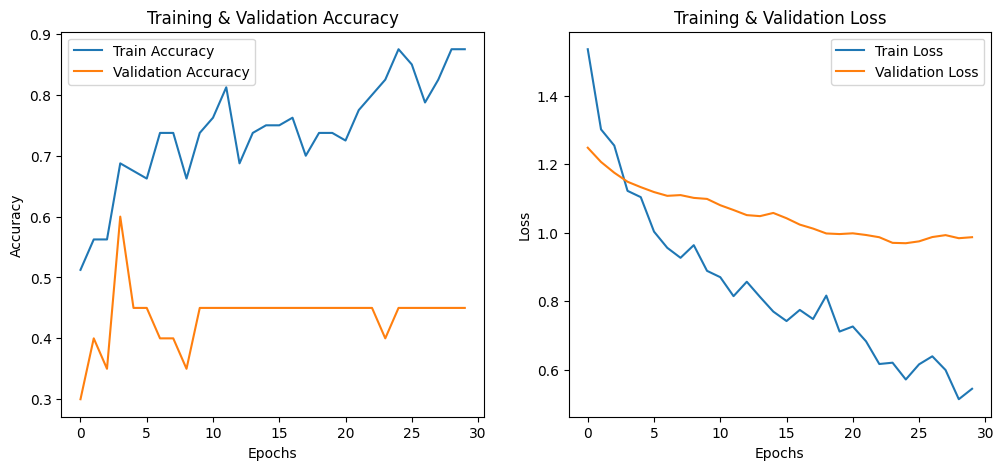

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset
X = np.random.rand(100, 10)
y = np.random.randint(2, size=100)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_dim=10, kernel_regularizer=l2(0.01)),  # More neurons + L2 Regularization
    BatchNormalization(),  # Normalizes activations
    Dropout(0.3),  # Drops 30% of neurons to prevent overfitting
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model with an adjusted learning rate
optimizer = Adam(learning_rate=0.01)  # Slightly higher initial LR
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model
history = model.fit(X, y, epochs=50, batch_size=16, validation_split=0.2, verbose=1,
                    callbacks=[early_stop, lr_scheduler])

# Plot training accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np

# Generate dummy dataset (10 features, binary classification)
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, size=(1000,))

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Model summary
model.summary()


c:\Users\venka\AppData\Local\anaconda3\envs\ML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5021 - loss: 0.6960 - val_accuracy: 0.4300 - val_loss: 0.7010
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5285 - loss: 0.6918 - val_accuracy: 0.4500 - val_loss: 0.7008
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5540 - loss: 0.6866 - val_accuracy: 0.5100 - val_loss: 0.6982
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5725 - loss: 0.6853 - val_accuracy: 0.5350 - val_loss: 0.6908
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5646 - loss: 0.6848 - val_accuracy: 0.5200 - val_loss: 0.6920
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5768 - loss: 0.6834 - val_accuracy: 0.4900 - val_loss: 0.6949
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5957 - loss: 0.6793 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5937 - loss: 0.6753 - val_accuracy: 0.5300 - val_

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,453 (33.02 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,636 (22.02 KB)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6021 - loss: 0.6687 - val_accuracy: 0.5150 - val_loss: 0.6914
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5761 - loss: 0.6764 - val_accuracy: 0.5250 - val_loss: 0.6896
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5919 - loss: 0.6673 - val_accuracy: 0.5150 - val_loss: 0.6909
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5903 - loss: 0.6737 - val_accuracy: 0.4900 - val_loss: 0.6927
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5979 - loss: 0.6691 - val_accuracy: 0.5650 - val_loss: 0.6833
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6182 - loss: 0.6603 - val_accuracy: 0.5050 - val_loss: 0.6882
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5811 - loss: 0.6702 - val_accuracy: 0.5200 - val_loss: 0.6925
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6225 - loss: 0.6559 - val_accuracy: 0.5100 - val_l

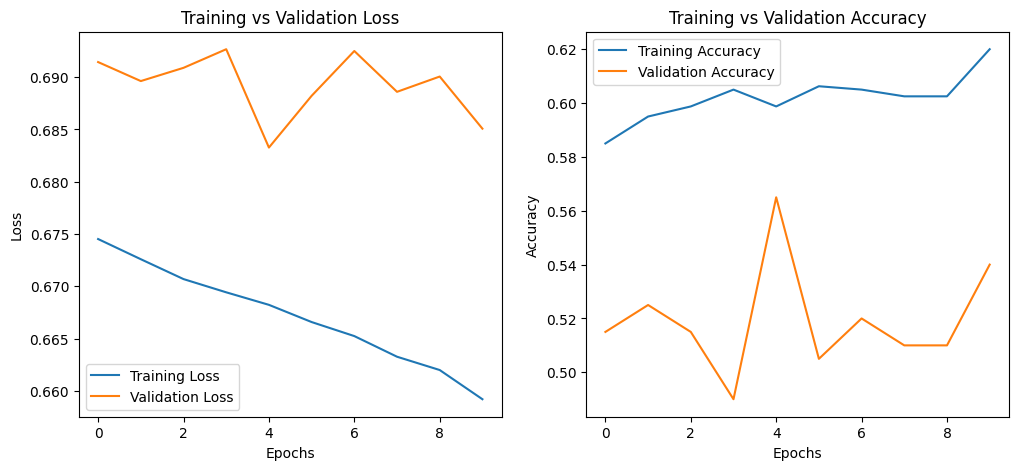

In [12]:
# Train model and store training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot training & validation loss
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.show()